In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from Deliverable_5_1.LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 25 iterations.
Simulating time 0.00: 

c:\Users\tomso\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(



Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.30: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.35: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.40: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.45: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.50: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.55: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.60: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulating time 0.65: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.21 > 0.17, 
Simulat

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

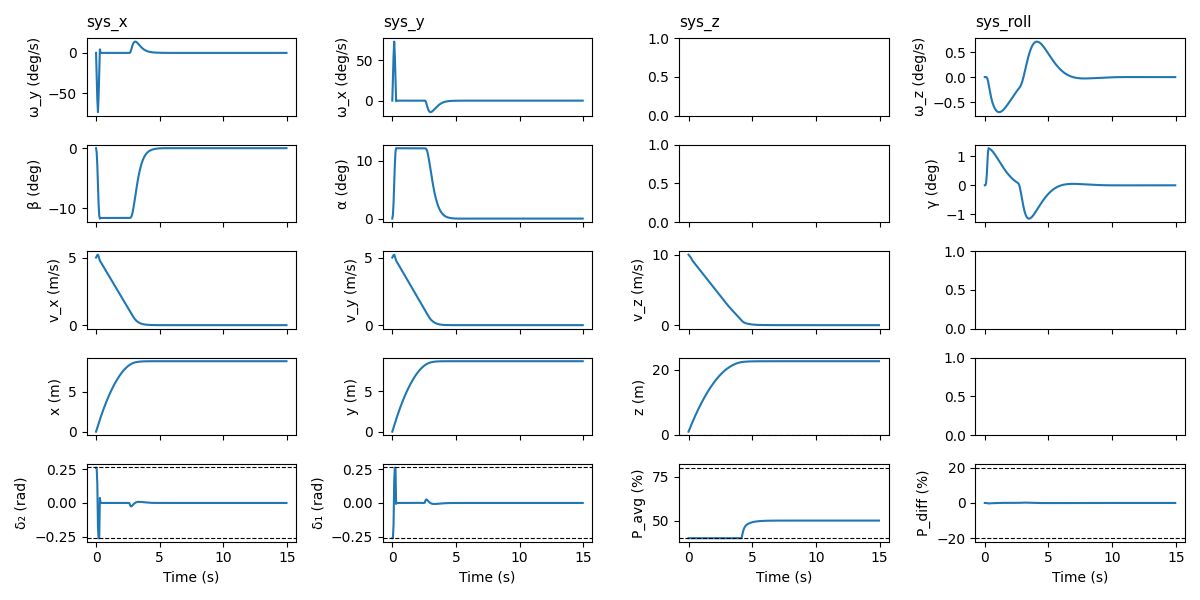

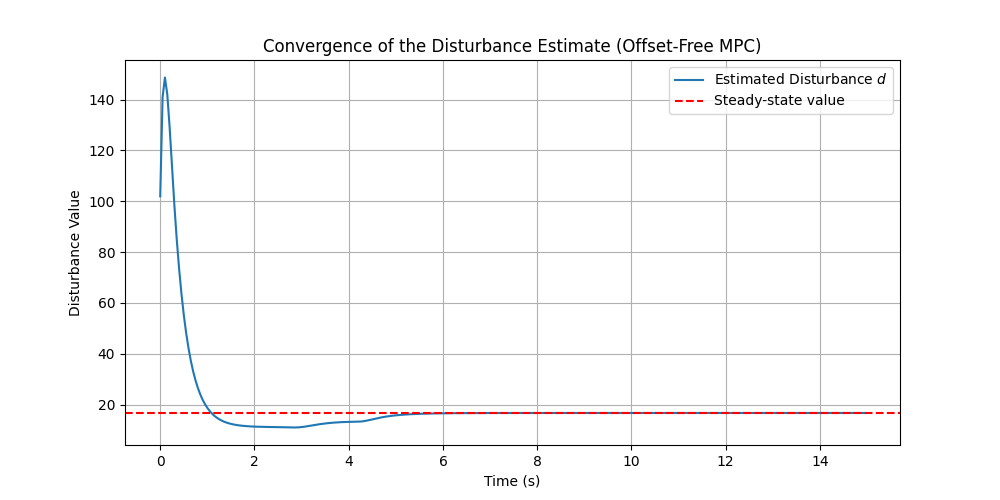

In [4]:
Ts = 0.05
sim_time = 15; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl)

#--- Plot to see the d estimation evolution ---#

import matplotlib.pyplot as plt

t = np.arange(len(mpc.mpc_z.d_est_values)) * Ts


plt.figure(figsize=(10, 5))
plt.plot(t, mpc.mpc_z.d_est_values, label='Estimated Disturbance $d$')
plt.axhline(y=np.mean(mpc.mpc_z.d_est_values[-10:]), color='r', linestyle='--', label='Steady-state value') 

plt.title('Convergence of the Disturbance Estimate (Offset-Free MPC)')
plt.xlabel('Time (s)')
plt.ylabel('Disturbance Value')
plt.grid(True)
plt.legend()


plt.show()

Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 10 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 25 iterations.
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.30: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.35: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.40: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.45: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.50: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.55: 
 St

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

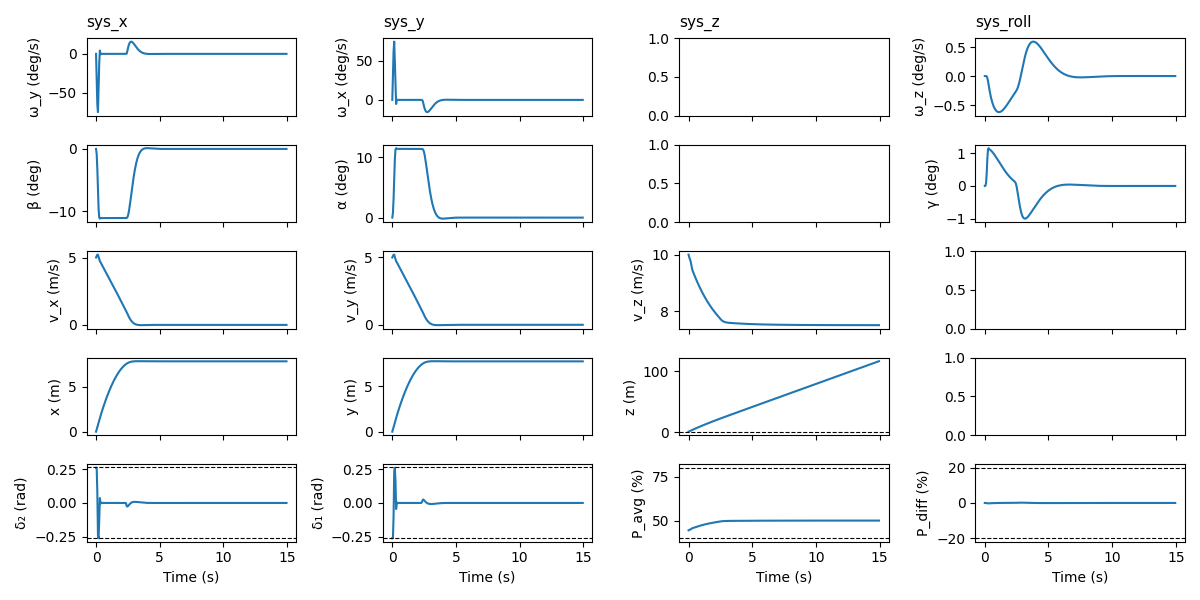

In [6]:
#With PART 4 controller

from Deliverable_4_1.LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Ts = 0.05
sim_time = 15; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol);
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl) 

